#Imports

In [184]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_palette("Set2")

In [185]:
file_path = "BASE DE DADOS PEDE 2024 - DATATHON.xlsx"
df_2022_raw = pd.read_excel(file_path, sheet_name="PEDE2022")
df_2023_raw = pd.read_excel(file_path, sheet_name="PEDE2023")
df_2024_raw = pd.read_excel(file_path, sheet_name="PEDE2024")

# Tratamento de dados

## Funções Auxiliares

Função para tratar o nome das colunas, transformando em `lowercase`, removendo caracteres especiais e substituindo espaços por `_`.

In [186]:
def clean_columns(df):
  df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .map(lambda x: unicodedata.normalize("NFKD", x)
        .encode("ascii", "ignore")
        .decode("utf-8"))
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"[^\w_]", "", regex=True)
  )
  return df

In [187]:
def normalize_fase(value):
  if pd.isna(value):
    return np.nan

  # se já é número
  if isinstance(value, (int, float, np.integer, np.floating)):
    return int(value)

  s = str(value).strip().upper()

  # caso ALFA
  if "ALFA" in s:
    return 0

  # extrai o primeiro número encontrado
  m = re.search(r"(\d+)", s)
  if m:
    return int(m.group(1))

  return np.nan

## 2022

In [188]:
df_2022_raw.head()

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,...,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [189]:
df_2022_raw.describe()

,Fase,Ano nasc,Idade 22,Ano ingresso,INDE 22,Cg,Cf,Ct,Nº Av,IAA,IEG,IPS,IDA,Matem,Portug,Inglês,IPV,IAN,Defas
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,858.000000,858.000000,283.000000,860.000000,860.000000,860.000000
mean,2.098837,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,6.905000,6.092907,5.806876,6.320979,5.881272,7.253642,6.424419,-0.943023
std,1.788789,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,1.070707,2.046209,2.414215,2.080364,2.957315,1.093383,2.389609,0.845593
min,0.000000,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000,-5.000000
25%,1.000000,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,6.300000,4.800000,4.300000,5.200000,3.500000,6.722000,5.000000,-1.000000
50%,2.000000,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,7.500000,6.300000,6.000000,6.700000,6.300000,7.333000,5.000000,-1.000000
75%,3.000000,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,7.500000,7.600000,7.800000,7.800000,8.500000,7.917000,10.000000,0.000000
max,7.000000,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [190]:
df_2022_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     860 non-null    object 
 1   Fase                   860 non-null    int64  
 2   Turma                  860 non-null    object 
 3   Nome                   860 non-null    object 
 4   Ano nasc               860 non-null    int64  
 5   Idade 22               860 non-null    int64  
 6   Gênero                 860 non-null    object 
 7   Ano ingresso           860 non-null    int64  
 8   Instituição de ensino  860 non-null    object 
 9   Pedra 20               323 non-null    object 
 10  Pedra 21               462 non-null    object 
 11  Pedra 22               860 non-null    object 
 12  INDE 22                860 non-null    float64
 13  Cg                     860 non-null    int64  
 14  Cf                     860 non-null    int64  
 15  Ct    

In [191]:
df_2022 = clean_columns(df_2022_raw)
df_2022.head()

,ra,fase,turma,nome,ano_nasc,idade_22,genero,ano_ingresso,instituicao_de_ensino,pedra_20,...,ingles,indicado,atingiu_pv,ipv,ian,fase_ideal,defas,destaque_ieg,destaque_ida,destaque_ipv
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


A base de dados de 2022 não contém IPP. Porém, como temos presente todos os outros valores e os pesos foram providenciados no documento adicional, podemos calcular o valor do IPP.

In [192]:
def calcula_ipp(row):
    fase = row["fase"]

    pesos = {
        "ian": 0.10,
        "ida": 0.20,
        "ieg": 0.20,
        "iaa": 0.10,
        "ips": 0.10,
        "ipp": 0.10,
        "ipv": 0.20
    }

    # protect against bad rows
    if pd.isna(fase) or fase == 8:
        return np.nan

    if row[["ian","ida","ieg","iaa","ips","ipv","inde_22"]].isna().any():
        return np.nan

    soma = (
        row["ian"] * pesos["ian"]
        + row["ida"] * pesos["ida"]
        + row["ieg"] * pesos["ieg"]
        + row["iaa"] * pesos["iaa"]
        + row["ips"] * pesos["ips"]
        + row["ipv"] * pesos["ipv"]
    )

    ipp = (row["inde_22"] - soma) / pesos["ipp"]

    return float(ipp)

In [193]:
df_2022["ipp"] = df_2022.apply(calcula_ipp, axis=1)
df_2022.head()

,ra,fase,turma,nome,ano_nasc,idade_22,genero,ano_ingresso,instituicao_de_ensino,pedra_20,...,indicado,atingiu_pv,ipv,ian,fase_ideal,defas,destaque_ieg,destaque_ida,destaque_ipv,ipp
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.174
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.894
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.198
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.554
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.392


Normalizando os valores da coluna gênero para seguir o padrão das outras bases.

In [194]:
df_2022["genero"] = df_2022["genero"].replace({
    "Menina": "Feminino",
    "Menino": "Masculino"
})

Selecionando as colunas de interesse do DF

In [195]:
#selecionando colunas de interesse
df_2022_clean = df_2022[['nome', 'fase', 'turma', 'ano_nasc', 'idade_22', 'genero', 'ano_ingresso', 'instituicao_de_ensino', 'pedra_22', 'inde_22', 'no_av', 'iaa', 'ieg', 'ips', 'ida', 'ipv', 'ian', 'ipp', 'fase_ideal', 'defas']]
df_2022_clean.head()

,nome,fase,turma,ano_nasc,idade_22,genero,ano_ingresso,instituicao_de_ensino,pedra_22,inde_22,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1,7,A,2003,19,Feminino,2016,Escola Pública,Quartzo,5.783,4,8.3,4.1,5.6,4.0,7.278,5.0,8.174,Fase 8 (Universitários),-1
1,Aluno-2,7,A,2005,17,Feminino,2017,Rede Decisão,Ametista,7.055,4,8.8,5.2,6.3,6.8,6.778,10.0,7.894,Fase 7 (3º EM),0
2,Aluno-3,7,A,2005,17,Feminino,2016,Rede Decisão,Ágata,6.591,4,0.0,7.9,5.6,5.6,7.556,10.0,8.198,Fase 7 (3º EM),0
3,Aluno-4,7,A,2005,17,Masculino,2017,Rede Decisão,Quartzo,5.951,4,8.8,4.5,5.6,5.0,5.278,10.0,5.554,Fase 7 (3º EM),0
4,Aluno-5,7,A,2005,17,Feminino,2016,Rede Decisão,Ametista,7.427,4,7.9,8.6,5.6,5.2,7.389,10.0,8.392,Fase 7 (3º EM),0


In [196]:
df_2022_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   860 non-null    object 
 1   fase                   860 non-null    int64  
 2   turma                  860 non-null    object 
 3   ano_nasc               860 non-null    int64  
 4   idade_22               860 non-null    int64  
 5   genero                 860 non-null    object 
 6   ano_ingresso           860 non-null    int64  
 7   instituicao_de_ensino  860 non-null    object 
 8   pedra_22               860 non-null    object 
 9   inde_22                860 non-null    float64
 10  no_av                  860 non-null    int64  
 11  iaa                    860 non-null    float64
 12  ieg                    860 non-null    float64
 13  ips                    860 non-null    float64
 14  ida                    860 non-null    float64
 15  ipv   

## 2023

In [197]:
df_2023_raw.head()

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-1,FASE 8,NaN,NaN,8E,Aluno-1,2003-03-10 00:00:00,1900-01-20 00:00:00,Feminino,2016,...,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,NaN
1,RA-1000,ALFA,7.9162,Ametista,ALFA U - G2/G3,Aluno-1000,4/20/2015,8,Feminino,2023,...,NaN,NaN,8.92,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
2,RA-1001,ALFA,8.1162,Topázio,ALFA U - G2/G3,Aluno-1001,3/13/2014,9,Feminino,2023,...,NaN,NaN,9.17,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
3,RA-1002,ALFA,7.9012,Ametista,ALFA U - G2/G3,Aluno-1002,7/13/2014,9,Feminino,2023,...,NaN,NaN,8.92,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
4,RA-1003,ALFA,7.6522,Ametista,ALFA V - G0/G1,Aluno-1003,1/22/2015,8,Masculino,2023,...,NaN,NaN,8.75,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [198]:
df_2023_raw.describe()

,INDE 2023,Ano ingresso,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,...,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
count,931.000000,1014.000000,0.0,600.000000,0.0,0.0,0.0,0.0,938.000000,0.0,...,334.000000,0.0,0.0,938.000000,1014.000000,1014.000000,0.0,0.0,0.0,0.0
mean,7.342309,2021.378698,NaN,7.262788,NaN,NaN,NaN,NaN,3.109808,NaN,...,6.200299,NaN,NaN,8.027897,7.243590,-0.654832,NaN,NaN,NaN,NaN
std,0.901757,1.873750,NaN,0.895774,NaN,NaN,NaN,NaN,0.768712,NaN,...,2.236545,NaN,NaN,0.945427,2.539585,0.821233,NaN,NaN,NaN,NaN
min,3.745542,2016.000000,NaN,3.700000,NaN,NaN,NaN,NaN,2.000000,NaN,...,0.000000,NaN,NaN,3.320000,2.500000,-4.000000,NaN,NaN,NaN,NaN
25%,6.724150,2021.000000,NaN,6.740250,NaN,NaN,NaN,NaN,3.000000,NaN,...,4.725000,NaN,NaN,7.462500,5.000000,-1.000000,NaN,NaN,NaN,NaN
50%,7.408033,2022.000000,NaN,7.402500,NaN,NaN,NaN,NaN,3.000000,NaN,...,6.400000,NaN,NaN,8.045000,5.000000,-1.000000,NaN,NaN,NaN,NaN
75%,7.996083,2023.000000,NaN,7.903500,NaN,NaN,NaN,NaN,4.000000,NaN,...,7.800000,NaN,NaN,8.668750,10.000000,0.000000,NaN,NaN,NaN,NaN
max,9.371200,2023.000000,NaN,9.442000,NaN,NaN,NaN,NaN,4.000000,NaN,...,10.000000,NaN,NaN,10.010000,10.000000,2.000000,NaN,NaN,NaN,NaN


In [199]:
df_2023_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1014 non-null   object 
 1   Fase                   1014 non-null   object 
 2   INDE 2023              931 non-null    float64
 3   Pedra 2023             931 non-null    object 
 4   Turma                  1014 non-null   object 
 5   Nome Anonimizado       1014 non-null   object 
 6   Data de Nasc           1014 non-null   object 
 7   Idade                  1014 non-null   object 
 8   Gênero                 1014 non-null   object 
 9   Ano ingresso           1014 non-null   int64  
 10  Instituição de ensino  1014 non-null   object 
 11  Pedra 20               240 non-null    object 
 12  Pedra 21               335 non-null    object 
 13  Pedra 22               600 non-null    object 
 14  Pedra 23               0 non-null      float64
 15  INDE

In [200]:
df_2023 = clean_columns(df_2023_raw)
df_2023.head()

,ra,fase,inde_2023,pedra_2023,turma,nome_anonimizado,data_de_nasc,idade,genero,ano_ingresso,...,indicado,atingiu_pv,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,destaque_ipv1
0,RA-1,FASE 8,NaN,NaN,8E,Aluno-1,2003-03-10 00:00:00,1900-01-20 00:00:00,Feminino,2016,...,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,NaN
1,RA-1000,ALFA,7.9162,Ametista,ALFA U - G2/G3,Aluno-1000,4/20/2015,8,Feminino,2023,...,NaN,NaN,8.92,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
2,RA-1001,ALFA,8.1162,Topázio,ALFA U - G2/G3,Aluno-1001,3/13/2014,9,Feminino,2023,...,NaN,NaN,9.17,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
3,RA-1002,ALFA,7.9012,Ametista,ALFA U - G2/G3,Aluno-1002,7/13/2014,9,Feminino,2023,...,NaN,NaN,8.92,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
4,RA-1003,ALFA,7.6522,Ametista,ALFA V - G0/G1,Aluno-1003,1/22/2015,8,Masculino,2023,...,NaN,NaN,8.75,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


Padronizando o DF com base no de 2022

Limpeza da coluna `fase`

In [201]:
df_2023["fase"] = df_2023["fase"].str.replace(r"FASE", "", regex=True)

In [202]:
df_2023["fase"] = df_2023["fase"].apply(normalize_fase).astype("Int64")


Limpeza da coluna `turma`

In [203]:
df_2023["turma"] = (
    df_2023["turma"]
    .str.replace(r"^(?:\d+|ALFA)\s*", "", regex=True)
    .str.strip()
)

Cálculo da data de nascimento e da idade

In [204]:
df_2023["data_de_nasc"] = pd.to_datetime(df_2023["data_de_nasc"], errors="coerce").dt.year.astype("Int64")

In [205]:
df_2023['idade'] = 2023 - df_2023['data_de_nasc']

Padronização do nome das colunas

In [206]:
df_2023 = df_2023.rename(columns={
    "nome_anonimizado": "nome",
    "data_de_nasc": "ano_nasc",
    "idade": "idade_23",
    "genero_anonimizado": "genero",
    "ano_de_ingresso": "ano_ingresso",
    "defasagem": "defas"
})

In [207]:
df_2023["no_av"] = pd.to_numeric(df_2023["no_av"], errors="coerce").astype("Int64")

Selecionando colunas de interesse

In [208]:
df_2023 = df_2023[['nome', 'fase', 'turma', 'ano_nasc', 'idade_23', 'genero', 'ano_ingresso', 'instituicao_de_ensino', 'pedra_2023', 'inde_2023', 'no_av', 'iaa', 'ieg', 'ips', 'ida', 'ipv', 'ian', 'ipp', 'fase_ideal', 'defas']]
df_2023.head()

,nome,fase,turma,ano_nasc,idade_23,genero,ano_ingresso,instituicao_de_ensino,pedra_2023,inde_2023,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1,8,E,2003,20,Feminino,2016,Privada *Parcerias com Bolsa 100%,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,10.0,NaN,Fase 8 (Universitários),0
1,Aluno-1000,0,U - G2/G3,2015,8,Feminino,2023,Pública,Ametista,7.9162,2,8.5,9.4,3.77,7.0,8.92,10.0,6.25,ALFA (1° e 2° ano),0
2,Aluno-1001,0,U - G2/G3,2014,9,Feminino,2023,Pública,Topázio,8.1162,2,9.0,9.1,7.52,7.8,9.17,5.0,7.50,Fase 1 (3° e 4° ano),-1
3,Aluno-1002,0,U - G2/G3,2014,9,Feminino,2023,Pública,Ametista,7.9012,2,9.0,9.7,7.52,7.0,8.92,5.0,6.25,Fase 1 (3° e 4° ano),-1
4,Aluno-1003,0,V - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.6522,2,9.0,8.5,7.52,4.0,8.75,10.0,7.50,ALFA (1° e 2° ano),0


Removendo dados nulos

In [209]:
df_2023_clean = df_2023.dropna()
df_2023_clean.head()

,nome,fase,turma,ano_nasc,idade_23,genero,ano_ingresso,instituicao_de_ensino,pedra_2023,inde_2023,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
1,Aluno-1000,0,U - G2/G3,2015,8,Feminino,2023,Pública,Ametista,7.9162,2,8.5,9.4,3.77,7.0,8.92,10.0,6.250,ALFA (1° e 2° ano),0
2,Aluno-1001,0,U - G2/G3,2014,9,Feminino,2023,Pública,Topázio,8.1162,2,9.0,9.1,7.52,7.8,9.17,5.0,7.500,Fase 1 (3° e 4° ano),-1
3,Aluno-1002,0,U - G2/G3,2014,9,Feminino,2023,Pública,Ametista,7.9012,2,9.0,9.7,7.52,7.0,8.92,5.0,6.250,Fase 1 (3° e 4° ano),-1
4,Aluno-1003,0,V - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.6522,2,9.0,8.5,7.52,4.0,8.75,10.0,7.500,ALFA (1° e 2° ano),0
5,Aluno-1004,0,V - G0/G1,2014,9,Feminino,2023,Pública,Topázio,8.3137,2,9.0,9.6,7.52,7.9,7.42,10.0,6.875,ALFA (1° e 2° ano),0


In [210]:
df_2023_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 1 to 1013
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   931 non-null    object 
 1   fase                   931 non-null    Int64  
 2   turma                  931 non-null    object 
 3   ano_nasc               931 non-null    Int64  
 4   idade_23               931 non-null    Int64  
 5   genero                 931 non-null    object 
 6   ano_ingresso           931 non-null    int64  
 7   instituicao_de_ensino  931 non-null    object 
 8   pedra_2023             931 non-null    object 
 9   inde_2023              931 non-null    float64
 10  no_av                  931 non-null    Int64  
 11  iaa                    931 non-null    float64
 12  ieg                    931 non-null    float64
 13  ips                    931 non-null    float64
 14  ida                    931 non-null    float64
 15  ipv       

## 2024

In [211]:
df_2024_raw.head()

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.9522,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,...,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,7.156367,Ametista,ALFA A - G0/G1,Aluno-868,2015-11-08,8,Masculino,2023,...,7.213333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,5.4442,Quartzo,ALFA A - G0/G1,Aluno-1278,2015-03-22,9,Masculino,2024,...,4.173333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


In [212]:
df_2024_raw.describe()

,Data de Nasc,Idade,Ano ingresso,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,...,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV
count,1156,1156.000000,1156.000000,472.000000,690.000000,0.0,0.0,0.0,1156.000000,0.0,...,1050.000000,474.000000,0.0,0.0,1054.000000,1156.000000,1156.000000,0.0,0.0,0.0
mean,2011-05-10 06:46:14.740484352,12.987889,2022.519896,7.368276,7.455472,NaN,NaN,NaN,2.951557,NaN,...,6.175762,6.595886,NaN,NaN,7.354268,7.683824,-0.409170,NaN,NaN,NaN
min,1996-12-08 02:00:00,7.000000,2021.000000,3.031806,4.406458,NaN,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,NaN,NaN,2.943333,2.500000,-3.000000,NaN,NaN,NaN
25%,2009-02-28 18:00:00,10.000000,2021.000000,6.890881,6.862402,NaN,NaN,NaN,2.000000,NaN,...,5.000000,5.000000,NaN,NaN,6.790625,5.000000,-1.000000,NaN,NaN,NaN
50%,2012-01-07 00:00:00,12.000000,2023.000000,7.475431,7.559046,NaN,NaN,NaN,3.000000,NaN,...,6.500000,7.000000,NaN,NaN,7.500000,10.000000,0.000000,NaN,NaN,NaN
75%,2014-02-06 06:00:00,15.000000,2024.000000,7.981160,8.048758,NaN,NaN,NaN,4.000000,NaN,...,8.000000,9.000000,NaN,NaN,8.085000,10.000000,0.000000,NaN,NaN,NaN
max,2017-06-02 00:00:00,27.000000,2024.000000,9.441522,9.371200,NaN,NaN,NaN,6.000000,NaN,...,10.000000,10.000000,NaN,NaN,9.760000,10.000000,3.000000,NaN,NaN,NaN
std,NaN,3.584699,1.204804,0.861821,0.850390,NaN,NaN,NaN,1.397985,NaN,...,2.379552,2.876249,NaN,NaN,1.048541,2.504055,0.850497,NaN,NaN,NaN


In [213]:
df_2024_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RA                     1156 non-null   object        
 1   Fase                   1156 non-null   object        
 2   INDE 2024              1092 non-null   object        
 3   Pedra 2024             1092 non-null   object        
 4   Turma                  1156 non-null   object        
 5   Nome Anonimizado       1156 non-null   object        
 6   Data de Nasc           1156 non-null   datetime64[ns]
 7   Idade                  1156 non-null   int64         
 8   Gênero                 1156 non-null   object        
 9   Ano ingresso           1156 non-null   int64         
 10  Instituição de ensino  1155 non-null   object        
 11  Pedra 20               191 non-null    object        
 12  Pedra 21               264 non-null    object        
 13  Ped

In [214]:
df_2024 = clean_columns(df_2024_raw)
df_2024.head()

,ra,fase,inde_2024,pedra_2024,turma,nome_anonimizado,data_de_nasc,idade,genero,ano_ingresso,...,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,escola,ativo_inativo,ativo_inativo1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.9522,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,...,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,7.156367,Ametista,ALFA A - G0/G1,Aluno-868,2015-11-08,8,Masculino,2023,...,7.213333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,5.4442,Quartzo,ALFA A - G0/G1,Aluno-1278,2015-03-22,9,Masculino,2024,...,4.173333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


Tratamento da coluna `fase`, de acordo com a base de 2022.

In [215]:
df_2024["fase"] = df_2024["fase"].str.replace(r"FASE", "", regex=True)

In [216]:
df_2024["fase"] = df_2024["fase"].apply(normalize_fase).astype("Int64")

Tratamento da coluna `turma`

In [217]:
df_2024["turma"] = (
    df_2024["turma"]
    .str.replace(r"^(?:\d+|ALFA)\s*", "", regex=True)
    .str.strip()
)

Cálculo da data de nascimento

In [218]:
df_2024["data_de_nasc"] = pd.to_datetime(df_2024["data_de_nasc"], errors="coerce").dt.year.astype("Int64")

Padronização do nome das collunas.

In [219]:
df_2024 = df_2024.rename(columns={
    "nome_anonimizado": "nome",
    "data_de_nasc": "ano_nasc",
    "idade": "idade_24",
    "genero_anonimizado": "genero",
    "ano_de_ingresso": "ano_ingresso",
    "defasagem": "defas"
})

Selecionando colunas de interesse

In [220]:
df_2024 = df_2024[['nome', 'fase', 'turma', 'ano_nasc', 'idade_24', 'genero', 'ano_ingresso', 'instituicao_de_ensino', 'pedra_2024', 'inde_2024', 'no_av', 'iaa', 'ieg', 'ips', 'ida', 'ipv', 'ian', 'ipp', 'fase_ideal', 'defas']]
df_2024.head()

,nome,fase,turma,ano_nasc,idade_24,genero,ano_ingresso,instituicao_de_ensino,pedra_2024,inde_2024,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1275,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.611367,3,10.002,8.666667,6.26,8.0,5.446667,10.0,5.625,ALFA (1° e 2° ano),0
1,Aluno-1276,0,A - G0/G1,2016,8,Feminino,2024,Pública,Topázio,8.002867,3,10.002,9.333333,3.76,8.0,7.050000,10.0,7.500,ALFA (1° e 2° ano),0
2,Aluno-1277,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.9522,3,10.002,9.083333,3.76,8.0,7.046667,10.0,7.500,ALFA (1° e 2° ano),0
3,Aluno-868,0,A - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.156367,3,8.002,9.750000,3.76,7.0,7.213333,5.0,6.875,Fase 1 (3° e 4° ano),-1
4,Aluno-1278,0,A - G0/G1,2015,9,Masculino,2024,Pública,Quartzo,5.4442,3,9.002,4.166667,3.76,7.5,4.173333,5.0,5.000,Fase 1 (3° e 4° ano),-1


In [221]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   1156 non-null   object 
 1   fase                   1118 non-null   Int64  
 2   turma                  1118 non-null   object 
 3   ano_nasc               1156 non-null   Int64  
 4   idade_24               1156 non-null   int64  
 5   genero                 1156 non-null   object 
 6   ano_ingresso           1156 non-null   int64  
 7   instituicao_de_ensino  1155 non-null   object 
 8   pedra_2024             1092 non-null   object 
 9   inde_2024              1092 non-null   object 
 10  no_av                  1156 non-null   int64  
 11  iaa                    1054 non-null   float64
 12  ieg                    1156 non-null   float64
 13  ips                    1054 non-null   float64
 14  ida                    1055 non-null   float64
 15  ipv 

Removendo dados nulos do DF

In [222]:
df_2024_clean = df_2024.dropna()
df_2024_clean.head()

,nome,fase,turma,ano_nasc,idade_24,genero,ano_ingresso,instituicao_de_ensino,pedra_2024,inde_2024,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1275,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.611367,3,10.002,8.666667,6.26,8.0,5.446667,10.0,5.625,ALFA (1° e 2° ano),0
1,Aluno-1276,0,A - G0/G1,2016,8,Feminino,2024,Pública,Topázio,8.002867,3,10.002,9.333333,3.76,8.0,7.050000,10.0,7.500,ALFA (1° e 2° ano),0
2,Aluno-1277,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.9522,3,10.002,9.083333,3.76,8.0,7.046667,10.0,7.500,ALFA (1° e 2° ano),0
3,Aluno-868,0,A - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.156367,3,8.002,9.750000,3.76,7.0,7.213333,5.0,6.875,Fase 1 (3° e 4° ano),-1
4,Aluno-1278,0,A - G0/G1,2015,9,Masculino,2024,Pública,Quartzo,5.4442,3,9.002,4.166667,3.76,7.5,4.173333,5.0,5.000,Fase 1 (3° e 4° ano),-1


In [223]:
df_2024_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1053 entries, 0 to 1053
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   1053 non-null   object 
 1   fase                   1053 non-null   Int64  
 2   turma                  1053 non-null   object 
 3   ano_nasc               1053 non-null   Int64  
 4   idade_24               1053 non-null   int64  
 5   genero                 1053 non-null   object 
 6   ano_ingresso           1053 non-null   int64  
 7   instituicao_de_ensino  1053 non-null   object 
 8   pedra_2024             1053 non-null   object 
 9   inde_2024              1053 non-null   object 
 10  no_av                  1053 non-null   int64  
 11  iaa                    1053 non-null   float64
 12  ieg                    1053 non-null   float64
 13  ips                    1053 non-null   float64
 14  ida                    1053 non-null   float64
 15  ipv      

## Agrupamento dos DFs

In [224]:
df_2022_clean = df_2022_clean.rename(columns={
    'idade_22': 'idade',
    'pedra_22': 'pedra',
    'inde_22': 'inde'
})
df_2022_clean['ano'] = 2022

df_2023_clean = df_2023_clean.rename(columns={
    'idade_23': 'idade',
    'pedra_2023': 'pedra',
    'inde_2023': 'inde'
})
df_2023_clean['ano'] = 2023

df_2024_clean = df_2024_clean.rename(columns={
    'idade_24': 'idade',
    'pedra_2024': 'pedra',
    'inde_2024': 'inde'
})
df_2024_clean['ano'] = 2024

df_combined = pd.concat([df_2022_clean, df_2023_clean, df_2024_clean], ignore_index=True)

df_combined['inde'] = pd.to_numeric(df_combined['inde'], errors='coerce')
df_combined['fase'] = df_combined['fase'].astype(str)

df_combined.head()

,nome,fase,turma,ano_nasc,idade,genero,ano_ingresso,instituicao_de_ensino,pedra,inde,...,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas,ano
0,Aluno-1,7,A,2003,19,Feminino,2016,Escola Pública,Quartzo,5.783,...,8.3,4.1,5.6,4.0,7.278,5.0,8.174,Fase 8 (Universitários),-1,2022
1,Aluno-2,7,A,2005,17,Feminino,2017,Rede Decisão,Ametista,7.055,...,8.8,5.2,6.3,6.8,6.778,10.0,7.894,Fase 7 (3º EM),0,2022
2,Aluno-3,7,A,2005,17,Feminino,2016,Rede Decisão,Ágata,6.591,...,0.0,7.9,5.6,5.6,7.556,10.0,8.198,Fase 7 (3º EM),0,2022
3,Aluno-4,7,A,2005,17,Masculino,2017,Rede Decisão,Quartzo,5.951,...,8.8,4.5,5.6,5.0,5.278,10.0,5.554,Fase 7 (3º EM),0,2022
4,Aluno-5,7,A,2005,17,Feminino,2016,Rede Decisão,Ametista,7.427,...,7.9,8.6,5.6,5.2,7.389,10.0,8.392,Fase 7 (3º EM),0,2022


# Análise dos questionamentos

## 1. Adequação do nível (IAN): Qual é o perfil geral de defasagem dos alunos (IAN) e como ele evolui ao longo do tempo?

Cálculo da faixa do IAN

In [225]:
df_combined['fase'].unique()

array(['7', '6', '5', '4', '3', '2', '1', '0'], dtype=object)

In [226]:
def calculo_faixa_ian(ian):
  if pd.isna(ian):
    return "Não informado"
  elif ian == 2.5:
    return "Insuficiente"
  elif ian == 5:
    return "Básico"
  elif ian == 10:
    return "Adequado"

In [227]:
df_combined['ian_faixa'] = df_combined['ian'].apply(calculo_faixa_ian)
df_combined.head()

,nome,fase,turma,ano_nasc,idade,genero,ano_ingresso,instituicao_de_ensino,pedra,inde,...,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas,ano,ian_faixa
0,Aluno-1,7,A,2003,19,Feminino,2016,Escola Pública,Quartzo,5.783,...,4.1,5.6,4.0,7.278,5.0,8.174,Fase 8 (Universitários),-1,2022,Básico
1,Aluno-2,7,A,2005,17,Feminino,2017,Rede Decisão,Ametista,7.055,...,5.2,6.3,6.8,6.778,10.0,7.894,Fase 7 (3º EM),0,2022,Adequado
2,Aluno-3,7,A,2005,17,Feminino,2016,Rede Decisão,Ágata,6.591,...,7.9,5.6,5.6,7.556,10.0,8.198,Fase 7 (3º EM),0,2022,Adequado
3,Aluno-4,7,A,2005,17,Masculino,2017,Rede Decisão,Quartzo,5.951,...,4.5,5.6,5.0,5.278,10.0,5.554,Fase 7 (3º EM),0,2022,Adequado
4,Aluno-5,7,A,2005,17,Feminino,2016,Rede Decisão,Ametista,7.427,...,8.6,5.6,5.2,7.389,10.0,8.392,Fase 7 (3º EM),0,2022,Adequado


Perfil da defasagem IAN por ano

In [228]:
perfil_ian = (
  df_combined.dropna(subset=["ian_faixa"])
    .groupby(["ano", "ian_faixa"])
    .size()
    .reset_index(name="qtd")
)

perfil_ian["pct"] = (
  perfil_ian.groupby("ano")["qtd"]
    .transform(lambda x: (x / x.sum() * 100).round(2))
)

perfil_ian

,ano,ian_faixa,qtd,pct
0,2022,Adequado,259,30.12
1,2022,Básico,573,66.63
2,2022,Insuficiente,28,3.26
3,2023,Adequado,387,41.57
4,2023,Básico,531,57.04
5,2023,Insuficiente,13,1.40
6,2024,Adequado,519,49.29
7,2024,Básico,531,50.43
8,2024,Insuficiente,3,0.28


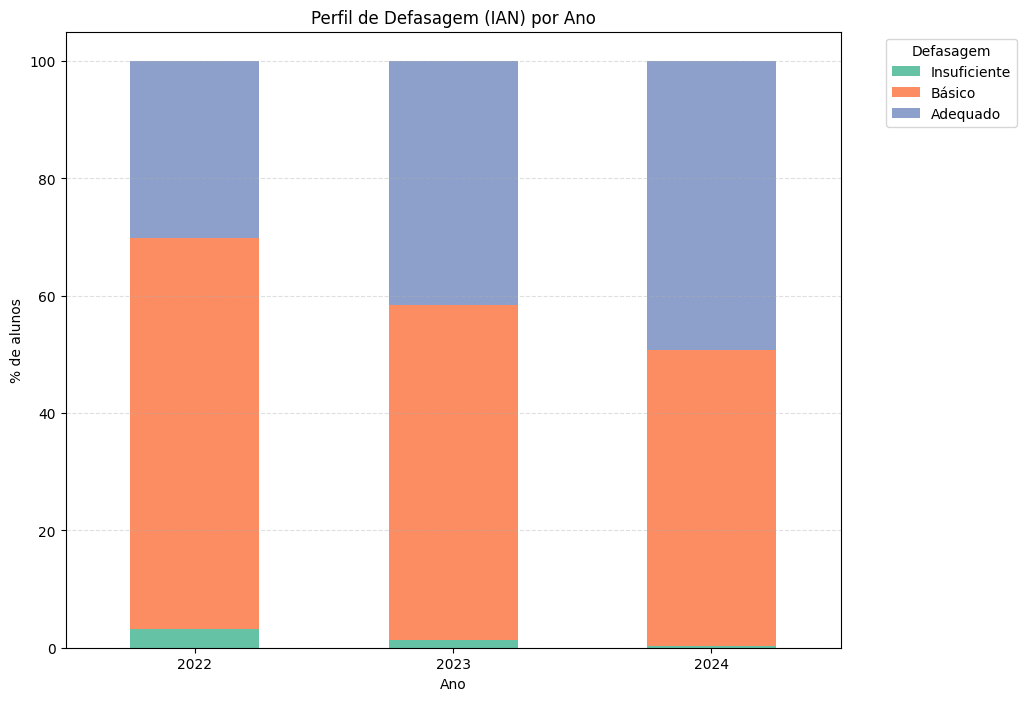

In [229]:
pivot_df = perfil_ian.pivot(index='ano', columns='ian_faixa', values='pct')
pivot_df = pivot_df[['Insuficiente', 'Básico', 'Adequado']]

pivot_df.plot(
  kind="bar", stacked=True, figsize=(10,8)
)

plt.title("Perfil de Defasagem (IAN) por Ano")
plt.ylabel("% de alunos")
plt.xlabel("Ano")
plt.xticks(rotation=360)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Defasagem", bbox_to_anchor=(1.05,1))
plt.show()

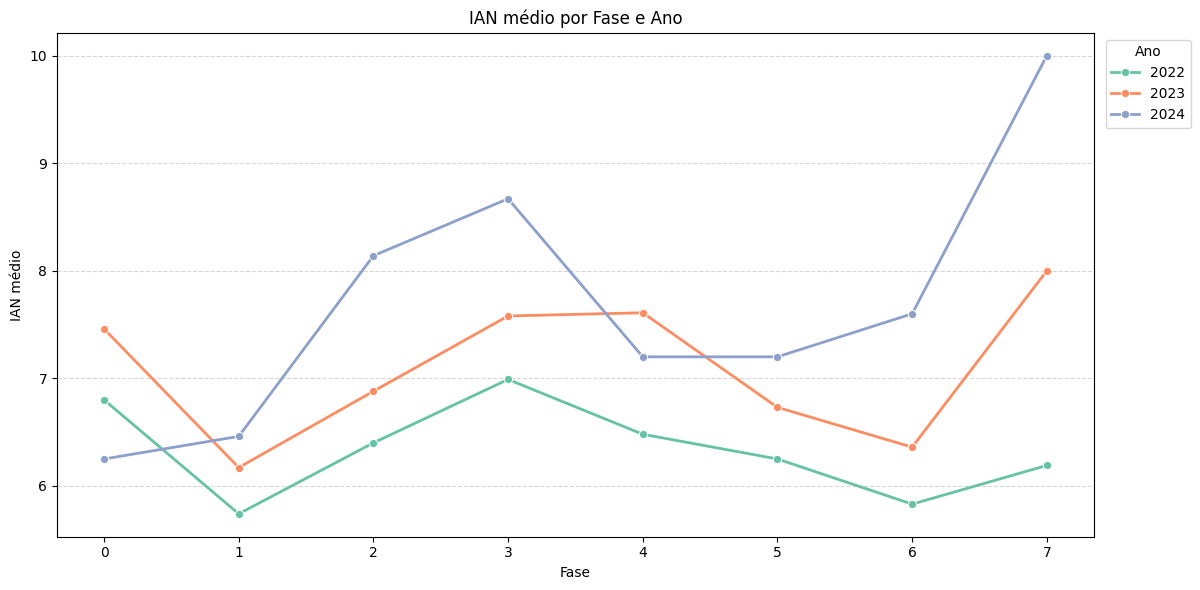

In [230]:
ian_group = (
  df_combined.groupby(['ano', 'fase'], as_index=False)['ian']
    .mean()
    .round(2)
    .rename(columns={'ian':'ian_medio'})
)
ian_group['ano'] = ian_group['ano'].astype(str)

plt.figure(figsize=(12, 6))

sns.lineplot(data=ian_group, x='fase', y='ian_medio', hue='ano', marker='o', linewidth=2, markers='o')

plt.title('IAN médio por Fase e Ano')
plt.xlabel('Fase')
plt.ylabel('IAN médio')
plt.legend(title='Ano', bbox_to_anchor=(1.1, 1), loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. Desempenho acadêmico (IDA): O desempenho acadêmico médio (IDA) está melhorando, estagnado ou caindo ao longo das fases e anos?

Análise do IDA por ano

In [231]:
ida_ano = (
  df_combined
    .groupby("ano", as_index=False)["ida"]
    .mean()
    .round(2)
    .rename(columns={"ida":"ida_medio"})
)

ida_ano

,ano,ida_medio
0,2022,6.09
1,2023,6.67
2,2024,6.35


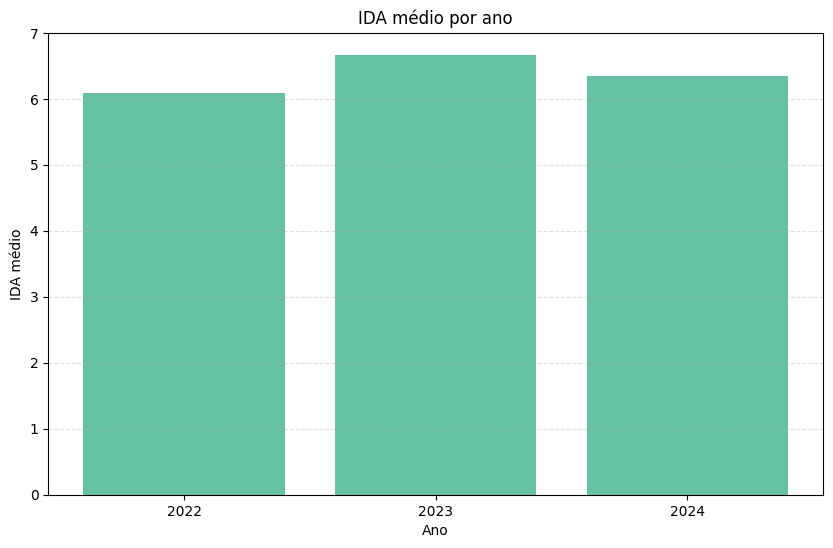

In [232]:
plt.figure(figsize=(10,6))

plt.bar(ida_ano["ano"].astype(str), ida_ano["ida_medio"])
plt.title("IDA médio por ano")
plt.xlabel("Ano")
plt.ylabel("IDA médio")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

Análise do IDA por fase

In [233]:
ida_fase = (
  df_combined.dropna(subset=["ida","fase"])
    .groupby(['ano','fase'])
    .agg(
      ida_medio=('ida','mean')
    )
    .round(2)
    .reset_index()
)
ida_fase

,ano,fase,ida_medio
0,2022,0,7.14
1,2022,1,6.46
2,2022,2,5.41
3,2022,3,5.14
4,2022,4,6.05
5,2022,5,5.87
6,2022,6,6.69
7,2022,7,5.25
8,2023,0,7.42
9,2023,1,6.81


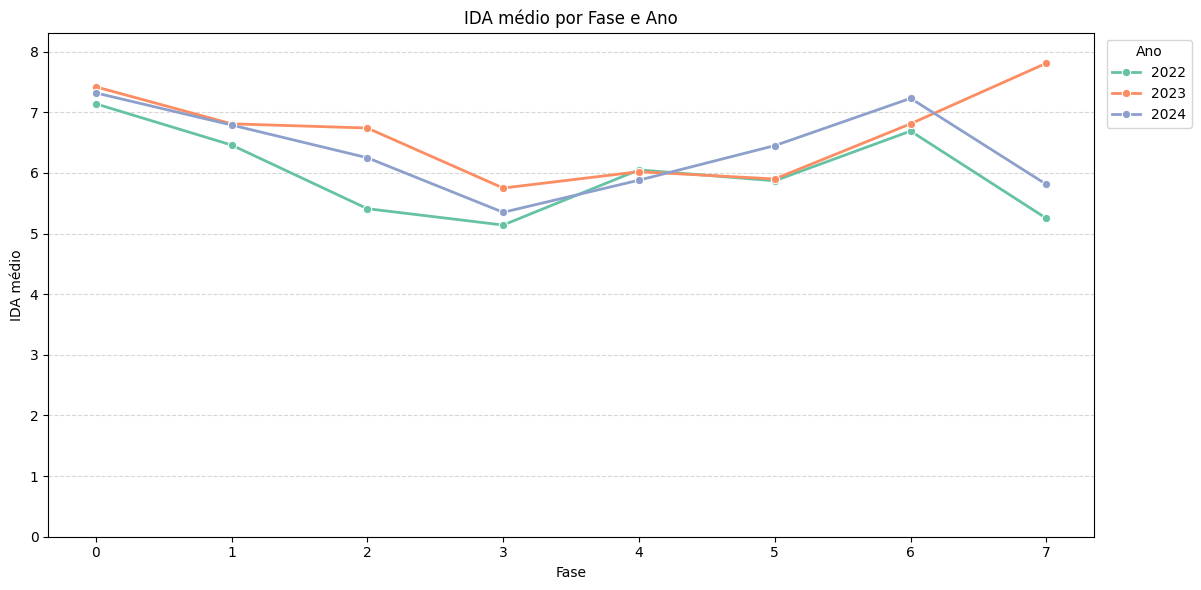

In [234]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=ida_fase, x='fase', y='ida_medio', hue='ano', marker='o', linewidth=2, markers='o', palette="Set2")

plt.title('IDA médio por Fase e Ano')
plt.xlabel('Fase')
plt.ylabel('IDA médio')
plt.ylim(0, ida_fase['ida_medio'].max() + .5)
plt.legend(title='Ano', bbox_to_anchor=(1.1, 1), loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

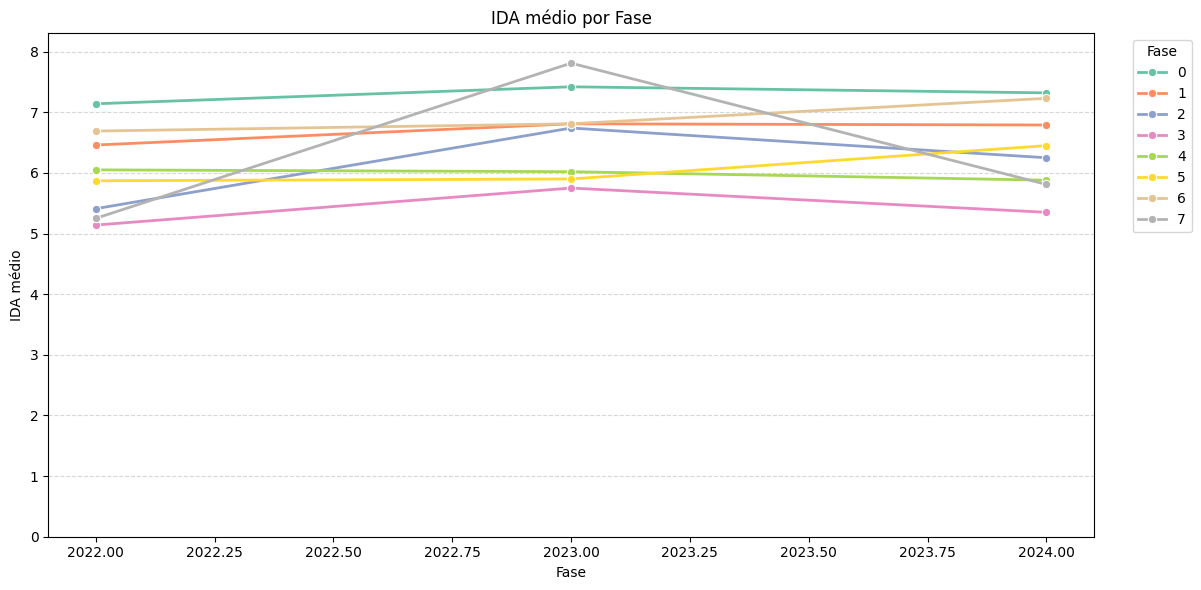

In [235]:
ida_fase_ano = (
  df_combined.dropna(subset=['ida', 'fase', 'ano'])
    .groupby(['fase', 'ano'])
    .agg(
      ida_medio=('ida','mean')
    )
    .round(2)
    .reset_index()
)

plt.figure(figsize=(12, 6))

sns.lineplot(data=ida_fase_ano, x='ano', y='ida_medio', hue='fase', marker='o', linewidth=2, markers='o', palette=sns.color_palette("Set2", 8))

plt.title('IDA médio por Fase')
plt.xlabel('Fase')
plt.ylabel('IDA médio')
plt.ylim(0, ida_fase_ano['ida_medio'].max() + .5)
plt.legend(title='Fase', bbox_to_anchor=(1.1, 1), loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [236]:
ida_fase_ano.pivot(index="fase", columns="ano", values="ida_medio")

ano,2022,2023,2024
fase,,,
0,7.14,7.42,7.32
1,6.46,6.81,6.79
2,5.41,6.74,6.25
3,5.14,5.75,5.35
4,6.05,6.02,5.88
5,5.87,5.90,6.45
6,6.69,6.81,7.23
7,5.25,7.81,5.81


## Engajamento nas atividades (IEG): O grau de engajamento dos alunos (IEG) tem relação direta com seus indicadores de desempenho (IDA) e do ponto de virada (IPV)?

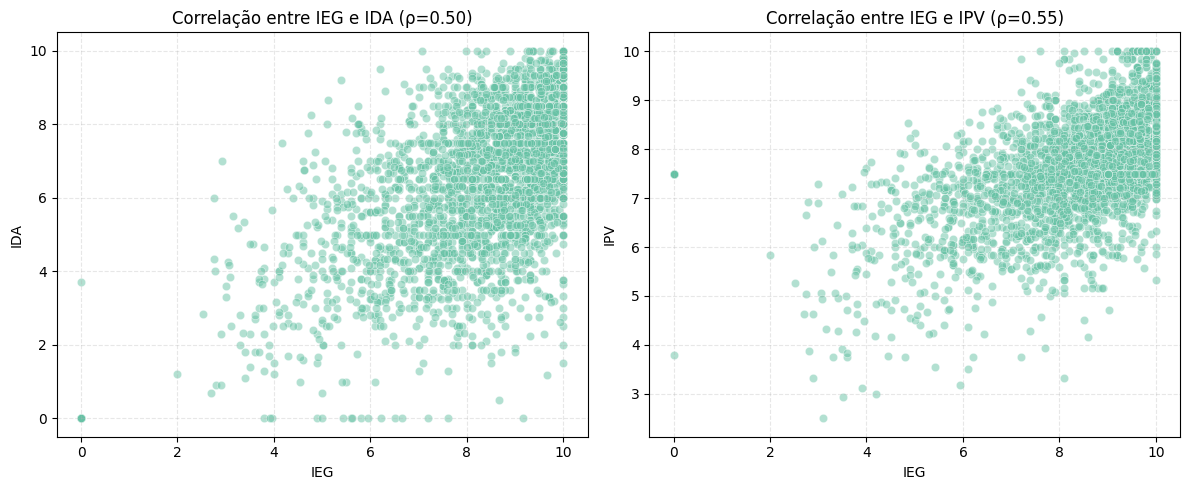

In [238]:
corr_ieg_ida = df_combined["ieg"].corr(df_combined["ida"], method="spearman")
corr_ieg_ipv = df_combined["ieg"].corr(df_combined["ipv"], method="spearman")

plt.figure(figsize=(12, 5))

# Scatterplot IEG vs IDA
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_combined, x='ieg', y='ida', alpha=0.5)
plt.title(f'Correlação entre IEG e IDA (ρ={corr_ieg_ida:.2f})')
plt.xlabel('IEG')
plt.ylabel('IDA')
plt.grid(True, linestyle='--', alpha=0.3)

# Scatterplot IEG vs IPV
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_combined, x='ieg', y='ipv', alpha=0.5)
plt.title(f'Correlação entre IEG e IPV (ρ={corr_ieg_ipv:.2f})')
plt.xlabel('IEG')
plt.ylabel('IPV')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Autoavaliação (IAA): As percepções dos alunos sobre si mesmos (IAA) são coerentes com seu desempenho real (IDA) e engajamento (IEG)?

Correlação entre IAA, IDA e IEG:
          iaa       ida       ieg
iaa  1.000000  0.115577  0.131512
ida  0.115577  1.000000  0.543414
ieg  0.131512  0.543414  1.000000


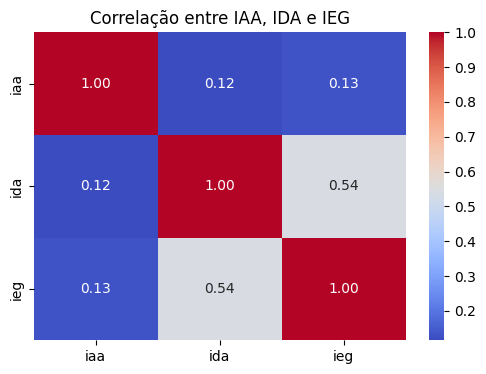

In [181]:
# Correlação entre IAA, IDA e IEG
corr_df = df_combined[['iaa', 'ida', 'ieg']].corr()

print("Correlação entre IAA, IDA e IEG:")
print(corr_df)

# Visualização das correlações
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre IAA, IDA e IEG")
plt.show()

In [242]:
# 1. Calculando o desvio simples
df_iaa = df_combined.copy()
df_iaa['desvio_ida'] = df_iaa['iaa'] - df_iaa['ida']

# 2. Categorizando a precisão
def categorizar_percepcao(row):
    diff = row['desvio_ida']
    if abs(diff) <= 1.5: # Margem de tolerância de 1.5 pontos
        return 'Realista'
    elif diff > 1.5:
        return 'Superestima'
    else:
        return 'Subestima'

df_iaa['perfil_analise'] = df_iaa.apply(categorizar_percepcao, axis=1)

# 3. Verificando a média de engajamento (IEG) por perfil
print(df_iaa.groupby('perfil_analise')['ieg'].mean())

perfil_analise
Realista       8.804941
Subestima      7.998527
Superestima    7.918675
Name: ieg, dtype: float64


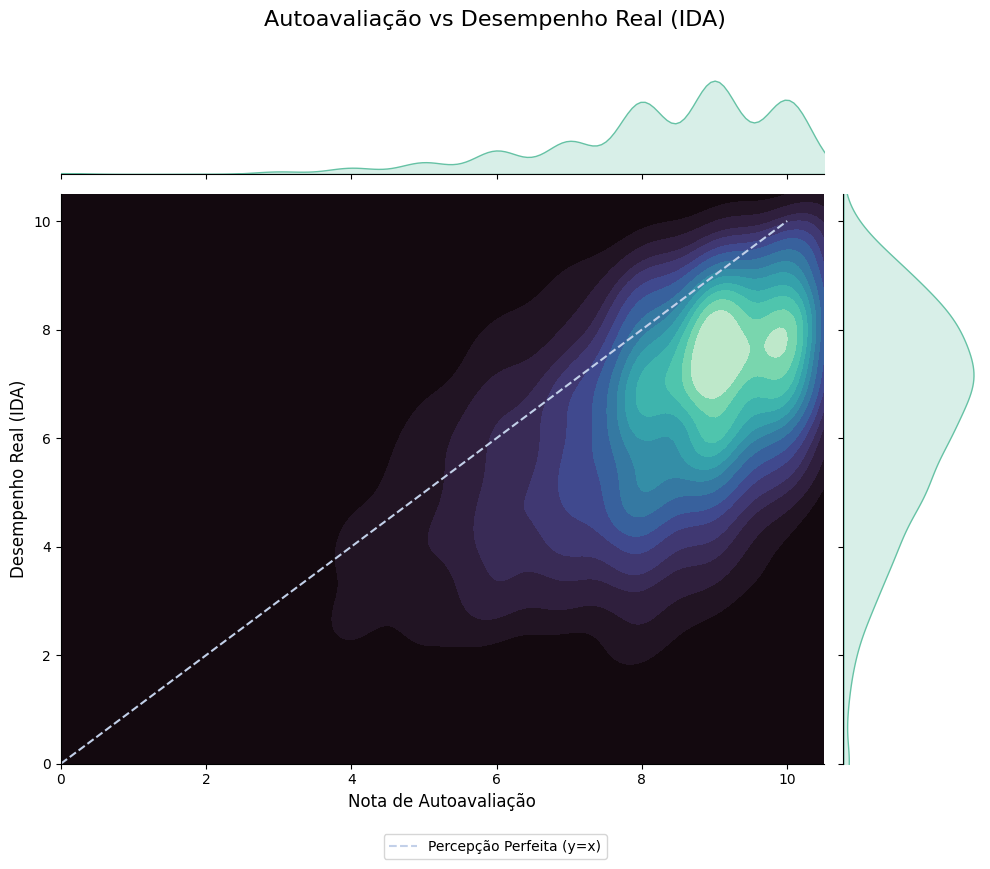

In [287]:
df_iaa['ieg'] = df_iaa['ieg'].round(0)

g = sns.jointplot(data=df_iaa, x='ieg', y='ida', kind="kde", fill=True, thresh=0, levels=15, cmap="mako")
g.ax_joint.plot([0, 10], [0, 10], color='#c2d0e9', linestyle='--', label='Percepção Perfeita (y=x)')

g.figure.set_size_inches(10, 8)
g.figure.suptitle("Autoavaliação vs Desempenho Real (IDA)", y=1.02, fontsize=16)
g.figure.legend(loc='lower center', bbox_to_anchor=(.5, -0.05))

plt.xlabel('Nota de Autoavaliação', fontsize=12)
plt.ylabel('Desempenho Real (IDA)', fontsize=12)
plt.xlim(0, 10.5)
plt.ylim(0, 10.5)

plt.tight_layout()
plt.show()

## 5. Aspectos psicossociais (IPS): Há padrões psicossociais (IPS) que antecedem quedas de desempenho acadêmico ou de engajamento?